<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B3%5D_HHV_cHB_RF_KFold_Var_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude HHV Data ML 111020.csv')
Oil_HHV = data['Bio-crude Oil HHV']
Features = data.drop('Bio-crude Oil HHV', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 123 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,25.8
30,0.0,0.0,45.5,45.5,0.0,9.1,0.0,39.2
60,0.0,6.5,52.8,0.0,0.0,38.7,1.1,26.2
90,23.6,42.0,0.0,0.0,5.9,0.0,26.4,34.5
120,0.1,71.3,0.5,0.3,22.0,0.2,5.6,38.5


In [3]:
# TODO: Minimum price of the data
minimum_Oil_HHV = np.min(Oil_HHV)

# TODO: Maximum price of the data
maximum_Oil_HHV = np.max(Oil_HHV)

# TODO: Mean price of the data
mean_Oil_HHV = np.mean(Oil_HHV)

# TODO: Median price of the data
median_Oil_HHV = np.median(Oil_HHV)

# TODO: Standard deviation of prices of the data
std_Oil_HHV = np.std(Oil_HHV)

# Show the calculated statistics

print("Statistics for bio-crude HHV dataset:\n")
print("Minimum bio-crude oil HHV:{: .2f} MJ/kg".format(minimum_Oil_HHV))
print("Maximum bio-crude oil HHV:{: .2f} MJ/kg".format(maximum_Oil_HHV))
print("Mean bio-crude oil HHV:{: .2f} MJ/kg".format(mean_Oil_HHV))
print("Median bio-crude oil HHV:{: .2f} MJ/kg".format(median_Oil_HHV))
print("Standard deviation of bio-crude oil HHV:{: .2f} MJ/kg".format(std_Oil_HHV))

data.describe()

Statistics for bio-crude HHV dataset:

Minimum bio-crude oil HHV: 17.70 MJ/kg
Maximum bio-crude oil HHV: 44.40 MJ/kg
Mean bio-crude oil HHV: 33.22 MJ/kg
Median bio-crude oil HHV: 34.00 MJ/kg
Standard deviation of bio-crude oil HHV: 5.09 MJ/kg


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,8.754472,24.526016,20.039837,8.446341,18.629268,8.554472,7.239024,33.221138
std,16.802543,26.330998,27.646648,16.922036,25.908710,14.504868,11.343089,5.108098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.700000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.250000
50%,1.700000,17.600000,1.000000,0.000000,9.000000,0.000000,3.000000,34.000000
75%,11.050000,44.050000,39.600000,9.200000,25.850000,14.300000,7.500000,36.550000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,44.400000


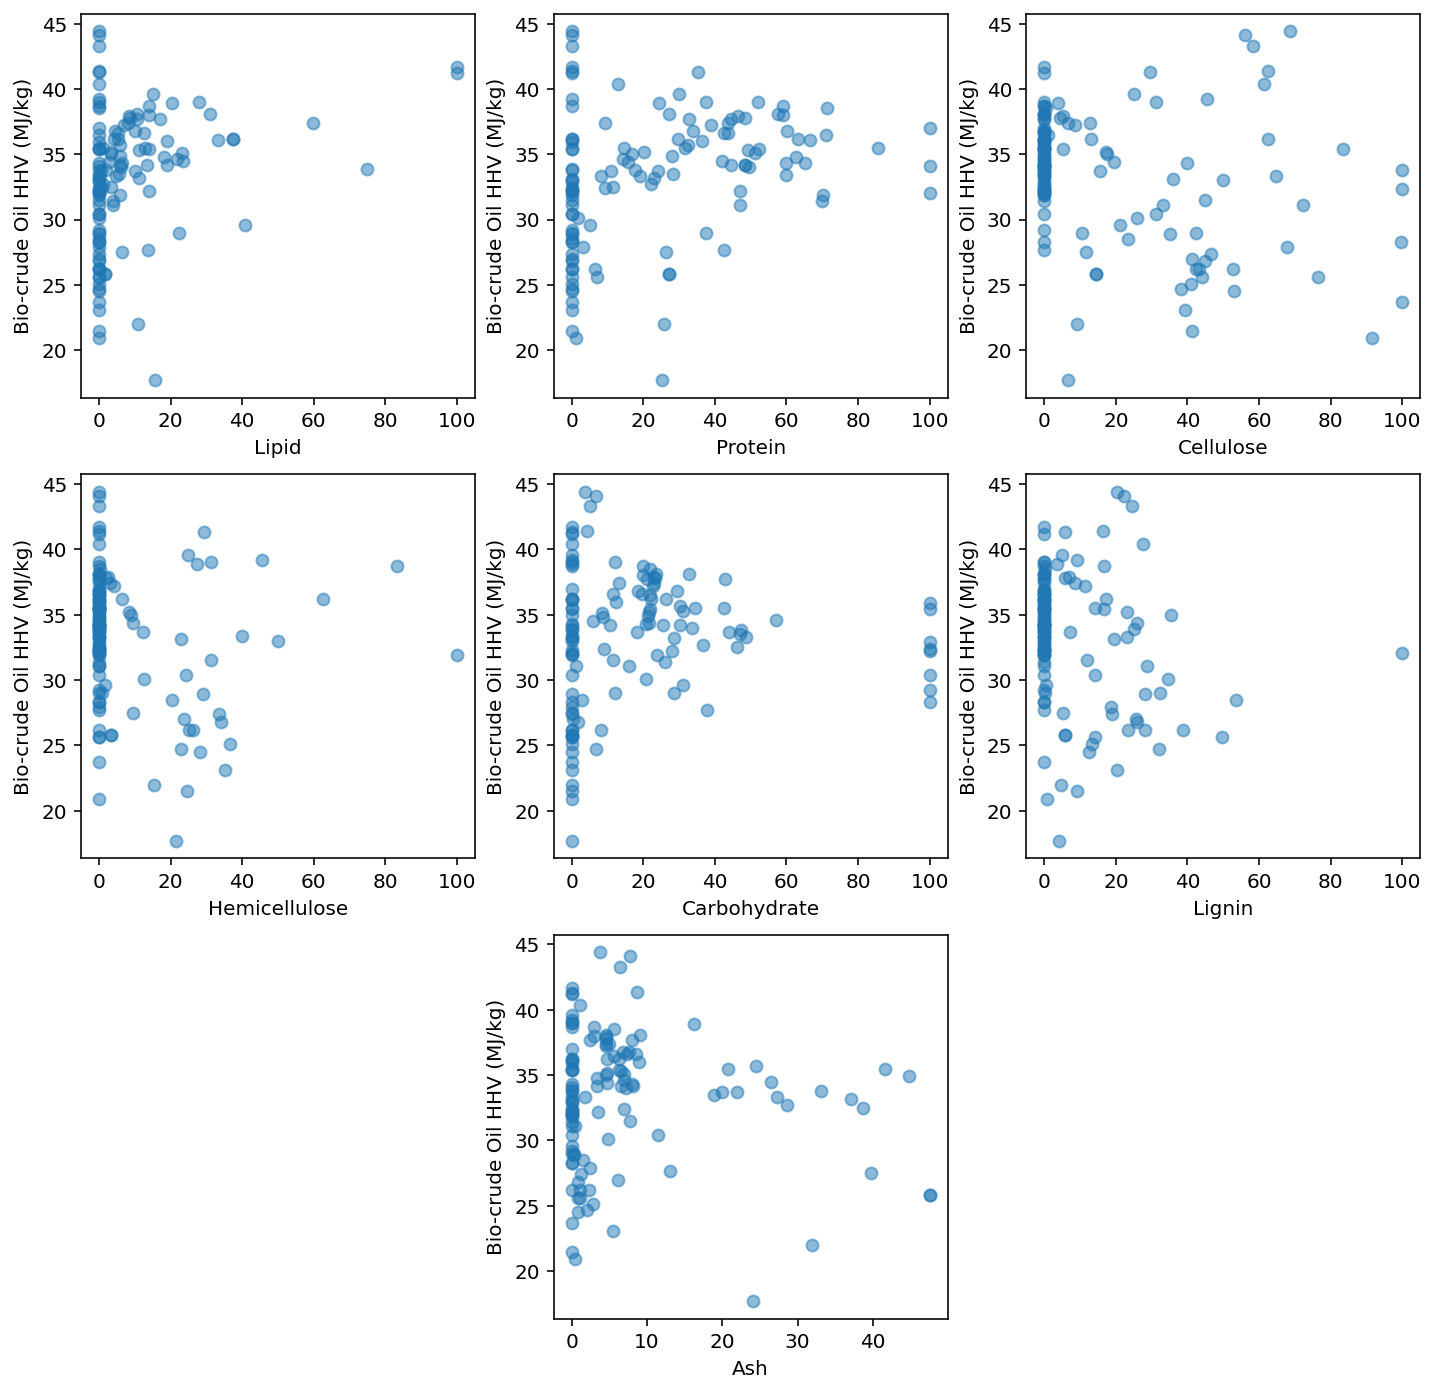

In [4]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lipid'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Protein'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lignin'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Ash'],data['Bio-crude Oil HHV'],alpha = 0.5)
plt.show()

(array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 2., 2., 5., 0.,
        2., 3., 3., 2., 3., 1., 3., 0., 4., 4., 6., 4., 7., 8., 5., 6., 7.,
        7., 5., 4., 4., 4., 5., 1., 1., 1., 0., 4., 0., 0., 1., 0., 2.]),
 array([17.7  , 18.234, 18.768, 19.302, 19.836, 20.37 , 20.904, 21.438,
        21.972, 22.506, 23.04 , 23.574, 24.108, 24.642, 25.176, 25.71 ,
        26.244, 26.778, 27.312, 27.846, 28.38 , 28.914, 29.448, 29.982,
        30.516, 31.05 , 31.584, 32.118, 32.652, 33.186, 33.72 , 34.254,
        34.788, 35.322, 35.856, 36.39 , 36.924, 37.458, 37.992, 38.526,
        39.06 , 39.594, 40.128, 40.662, 41.196, 41.73 , 42.264, 42.798,
        43.332, 43.866, 44.4  ]),
 <a list of 50 Patch objects>)

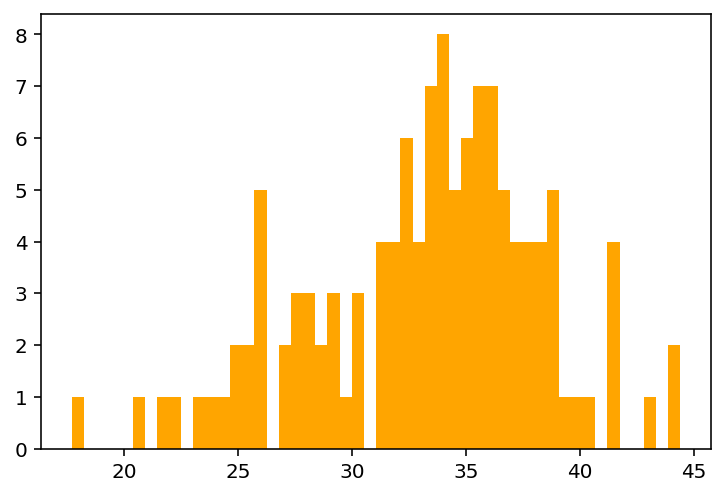

In [5]:
plt.hist(data['Bio-crude Oil HHV'],bins=50,color='orange')

(array([63.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

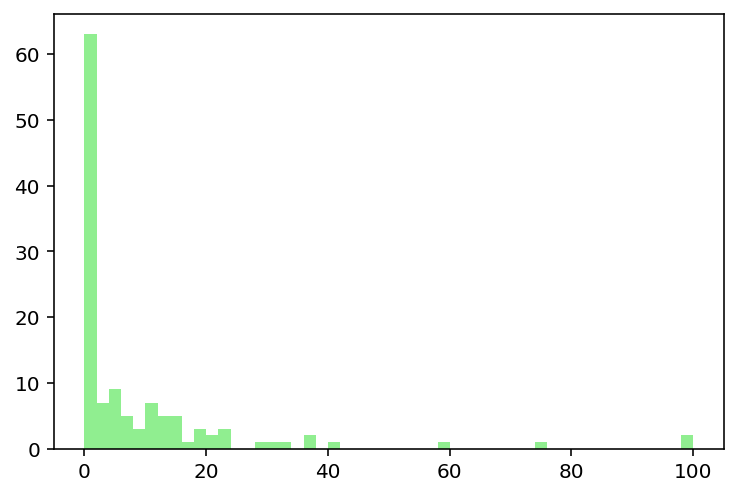

In [6]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


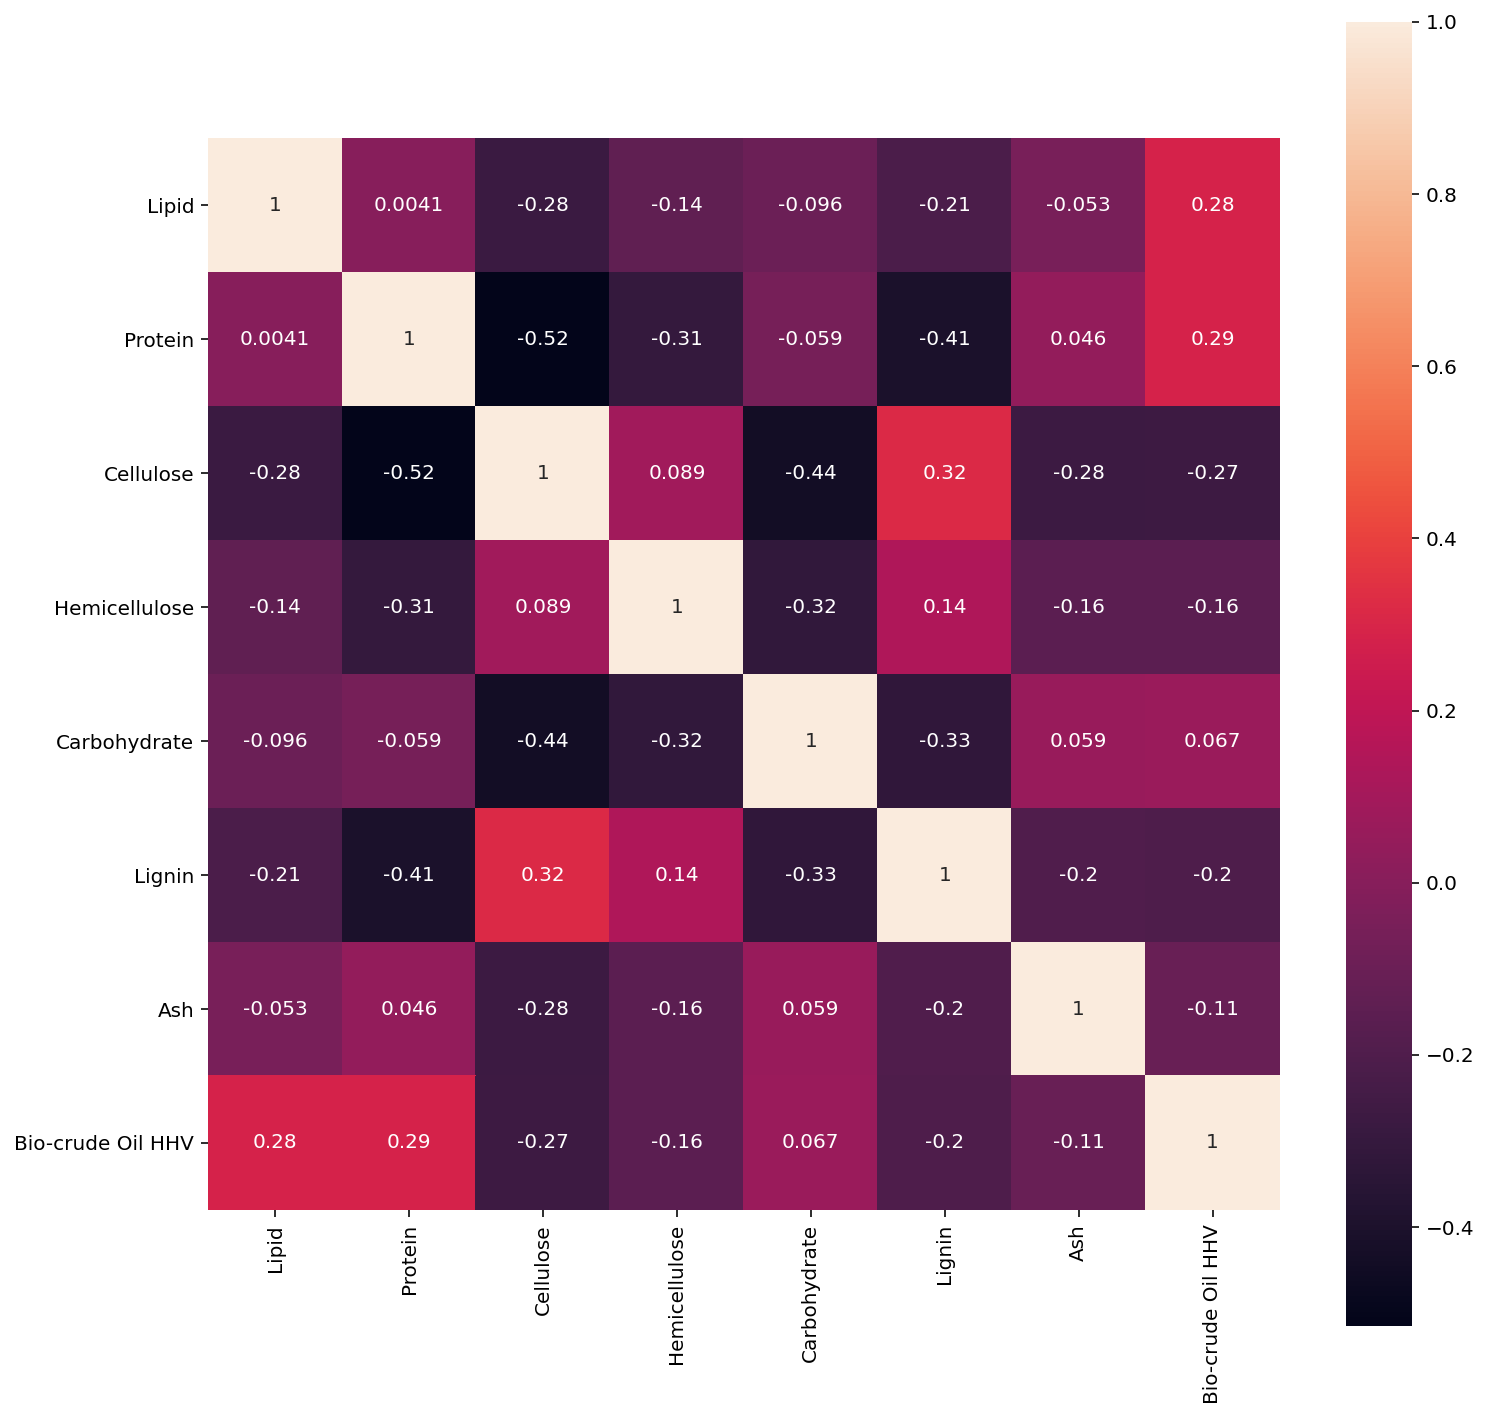

In [7]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [8]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [9]:
# No use now.
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.333)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
# feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
#                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
#                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
# for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
#  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 1.69552662167883
Optimal model has RMSE of test set: 4.584153720605472
Optimal model has R2 score of training set 0.88 on test data.
Optimal model has R2 score of test set 0.32 on test data.


In [10]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 1.3065040622543662
Standard deviation of MAE of training set 0.07826142872022451
Mean value of MAE of test set 2.812199144171094
Standard deviation of MAE of test set 0.3576387430424363

Mean value of RMSE of training set 1.7955488328716307
Standard deviation of RMSE of training set 0.13799959843510365
Mean value of RMSE of test set 3.7927743666566323
Standard deviation of RMSE of test set 0.5622486431243481

Mean value of R2 of training set 0.8750316953474945
Standard deviation of R2 of training set 0.008964492362241719
Mean value of R2 of test set 0.43591772622026226
Standard deviation of R2 of test set 0.07609875449638724

Mean value of MRE of training set 0.03934836234060385
Standard deviation of MRE of training set 0.0026735307101557002
Mean value of MRE of test set 0.08480547028029745
Standard deviation of MRE of test set 0.011942364931185771


Text(0.5, 1.0, 'y_pred vs. y_true')

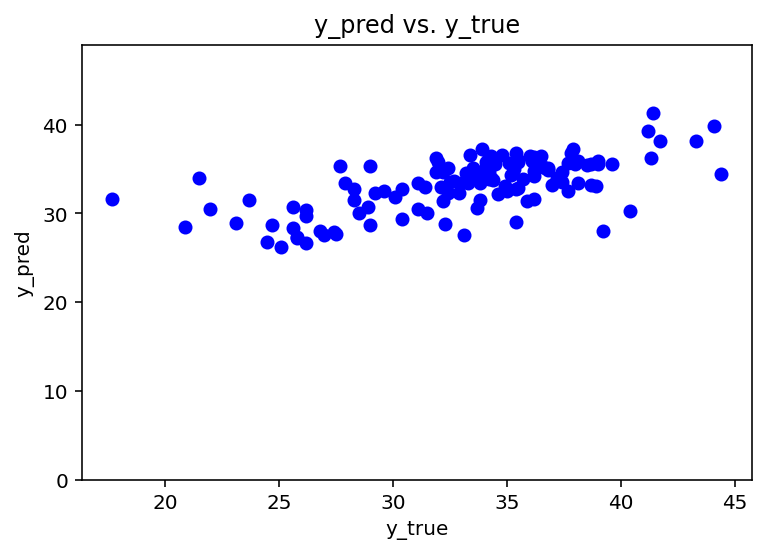

In [11]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_RFR.csv', index = False, header=True)

In [ ]:
# No use now.
def fit_model_tuning1(Features, Oil_HHV):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(min_samples_split=2, min_samples_leaf=1, max_depth=3, max_features='auto')
  
  param_test1 = {'n_estimators':range(10,141,10)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test1, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)

  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning1(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'n_estimators': 70} for the optimal model.
Optimal model has RMSE of training set: 4.486508447125672
Optimal model has RMSE of test set: 6.700484522779181
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [15]:
# n_estimators 参数的最佳取值(10, 201, 10)

for i in range(1, 201, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    params = {'n_estimators':i,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.350599125137492
Standard deviation of R2 of training set 0.18027700300485247
Mean value of R2 of test set -0.17314465740935892
Standard deviation of R2 of test set 0.21083569179290865
2
Mean value of R2 of training set 0.6564089330498771
Standard deviation of R2 of training set 0.021397176213250105
Mean value of R2 of test set 0.1541255838069878
Standard deviation of R2 of test set 0.09589740942942257
3
Mean value of R2 of training set 0.7641190356668986
Standard deviation of R2 of training set 0.011265232037682657
Mean value of R2 of test set 0.3028760594068213
Standard deviation of R2 of test set 0.11194101741682924
4
Mean value of R2 of training set 0.787338639467759
Standard deviation of R2 of training set 0.04073007992512709
Mean value of R2 of test set 0.3059943050096787
Standard deviation of R2 of test set 0.10738668850482876
5
Mean value of R2 of training set 0.8319644555092247
Standard deviation of R2 of training set 0.028427109677128852
Me

In [ ]:
# No use now.
def fit_model_tuning2(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, min_samples_leaf=1, max_features='auto')
  
  param_test2 = {'max_depth':range(1,16,2),'min_samples_split':range(2,43,20)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test2, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning2(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'max_depth': 13, 'min_samples_split': 2} for the optimal model.
Optimal model has RMSE of training set: 4.458782935335429
Optimal model has RMSE of test set: 6.729938638298037
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [17]:
# max_depth 参数的最佳取值(1, 16, 2)

for i in range(1, 21, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    params = {'n_estimators':10,'max_depth':i,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.19652692211862707
Standard deviation of R2 of training set 0.035588784107846314
Mean value of R2 of test set 0.15496457777152062
Standard deviation of R2 of test set 0.06406752474982756
2
Mean value of R2 of training set 0.4070464119328978
Standard deviation of R2 of training set 0.03505969039536326
Mean value of R2 of test set 0.25939402770977127
Standard deviation of R2 of test set 0.058563475406370386
3
Mean value of R2 of training set 0.5759509464587621
Standard deviation of R2 of training set 0.04019988553070267
Mean value of R2 of test set 0.35302464105348913
Standard deviation of R2 of test set 0.0656016597162705
4
Mean value of R2 of training set 0.7140917985343229
Standard deviation of R2 of training set 0.03256561888016741
Mean value of R2 of test set 0.41028714445234704
Standard deviation of R2 of test set 0.0840565962386506
5
Mean value of R2 of training set 0.7902931677148515
Standard deviation of R2 of training set 0.010017319404645635

In [ ]:
# No use now.
def fit_model_tuning3(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, max_depth=13, max_features='auto')
  
  param_test3 = {'min_samples_split':range(2,43,20),'min_samples_leaf':range(1,42,20)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test3, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning3(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'min_samples_leaf': 1, 'min_samples_split': 2} for the optimal model.
Optimal model has RMSE of training set: 4.404620581949159
Optimal model has RMSE of test set: 6.480535133251623
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [18]:
# min_samples_leaf 参数的最佳取值(1, 42, 20)

for i in range(1, 42, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    params = {'n_estimators':10,'max_depth':8,'min_samples_leaf':i,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.8341439889350276
Standard deviation of R2 of training set 0.0064240346278917615
Mean value of R2 of test set 0.4734392904428086
Standard deviation of R2 of test set 0.07023857774987396
2
Mean value of R2 of training set 0.7595910502405822
Standard deviation of R2 of training set 0.013931572016408362
Mean value of R2 of test set 0.43930762855415834
Standard deviation of R2 of test set 0.07725234847954283
3
Mean value of R2 of training set 0.6472828980058665
Standard deviation of R2 of training set 0.02043240706013809
Mean value of R2 of test set 0.3937878357562051
Standard deviation of R2 of test set 0.10000769691105386
4
Mean value of R2 of training set 0.5890288130498669
Standard deviation of R2 of training set 0.024919896689788466
Mean value of R2 of test set 0.36170429278284333
Standard deviation of R2 of test set 0.10080841738723066
5
Mean value of R2 of training set 0.5157788685247597
Standard deviation of R2 of training set 0.02904326237767405

In [21]:
# min_samples_split 参数的最佳取值(2, 43, 20)

for i in range(2, 44, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    params = {'n_estimators':10,'max_depth':8,'min_samples_leaf':1,'min_samples_split':i,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

2
Mean value of R2 of training set 0.8341439889350276
Standard deviation of R2 of training set 0.0064240346278917615
Mean value of R2 of test set 0.4734392904428086
Standard deviation of R2 of test set 0.07023857774987396
3
Mean value of R2 of training set 0.8270412178097327
Standard deviation of R2 of training set 0.011130641470577797
Mean value of R2 of test set 0.46224011993153086
Standard deviation of R2 of test set 0.08378769043094617
4
Mean value of R2 of training set 0.8130814634942962
Standard deviation of R2 of training set 0.015672524598145245
Mean value of R2 of test set 0.4700326170607522
Standard deviation of R2 of test set 0.0893077269391474
5
Mean value of R2 of training set 0.7868250818954322
Standard deviation of R2 of training set 0.012272280384121127
Mean value of R2 of test set 0.44627673816317576
Standard deviation of R2 of test set 0.06762723741403762
6
Mean value of R2 of training set 0.7791910295396317
Standard deviation of R2 of training set 0.01413456465937421

In [ ]:
# No use now.
def fit_model_tuning4(Features, Oil_Yields):
  from sklearn.model_selection import ShuffleSplit
  from sklearn.metrics import make_scorer
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV
  from math import sqrt
  from sklearn import metrics

  np.random.seed(seed = 262)
  data['random'] = np.random.random(size = len(data))
  # TODO: Shuffle and split the data into training and testing subsets
  cv_sets = ShuffleSplit(n_splits=10, test_size=0.20)
  
  Regressor=RandomForestRegressor(n_estimators=70, max_depth=13, min_samples_split=2, min_samples_leaf=1)
  
  param_test4 = {'max_features':range(1,7,1)}
  
  scoring_fnc = make_scorer(performance_metric)
  
  grid = GridSearchCV(Regressor, param_grid=param_test4, scoring=scoring_fnc, cv=cv_sets)
  
  grid = grid.fit(X_train, y_train)
  
  return grid.best_score_, grid.best_params_

best_score, best_params = fit_model_tuning4(X_train, y_train)

print("Parameter 'best_params' is {} for the optimal model.".format(best_params))

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train,y_train)
  
y_train_predict = estimator.predict(X_train)
y_test_predict = estimator.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)
  
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

Parameter 'best_params' is {'max_features': 6} for the optimal model.
Optimal model has RMSE of training set: 4.367443375627148
Optimal model has RMSE of test set: 6.620225804491208
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.


In [24]:
# max_features 参数的最佳取值(1, 7, 1)

for i in range(1, 8, 1):

  # TODO: Import 'RandomForestRegressor'
  from sklearn.ensemble import RandomForestRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 154)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 3 folds.  
  kf =KFold(n_splits=3, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    params = {'n_estimators':10,'max_depth':8,'min_samples_leaf':1,'min_samples_split':2,'max_features':i}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.832034024512852
Standard deviation of R2 of training set 0.03120716070888755
Mean value of R2 of test set 0.455661532602963
Standard deviation of R2 of test set 0.11072052403172963
2
Mean value of R2 of training set 0.8148819296897645
Standard deviation of R2 of training set 0.024384779763012922
Mean value of R2 of test set 0.4317245385040193
Standard deviation of R2 of test set 0.1157900468355692
3
Mean value of R2 of training set 0.8440606766203054
Standard deviation of R2 of training set 0.01794208080735244
Mean value of R2 of test set 0.38319499808354945
Standard deviation of R2 of test set 0.02569807024034804
4
Mean value of R2 of training set 0.8165221275532994
Standard deviation of R2 of training set 0.026449405119329035
Mean value of R2 of test set 0.41148565994810654
Standard deviation of R2 of test set 0.0947017665677575
5
Mean value of R2 of training set 0.8426110564560729
Standard deviation of R2 of training set 0.011113777053993532
Mean

In [ ]:
# No use now.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)
  
params = {'n_estimators':70,'max_depth':13,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Optimal model has RMSE of training set: 4.491368386486819
Optimal model has RMSE of test set: 6.506274335757428
Optimal model has R2 score of training set 0.92 on test data.
Optimal model has R2 score of test set 0.89 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 35.05 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 36.66 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 30.29 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, model.fit, feedstock_composition_data[i:i+1])

Trial 1: $34.18
Trial 2: $42.07
Trial 3: $41.24
Trial 4: $37.34
Trial 5: $39.89
Trial 6: $39.18
Trial 7: $39.65
Trial 8: $40.27
Trial 9: $36.92
Trial 10: $33.05

Range in prices: $9.02
Trial 1: $38.45
Trial 2: $42.22
Trial 3: $37.44
Trial 4: $35.13
Trial 5: $37.11
Trial 6: $35.04
Trial 7: $39.23
Trial 8: $38.50
Trial 9: $35.92
Trial 10: $39.39

Range in prices: $7.18
Trial 1: $31.94
Trial 2: $34.31
Trial 3: $32.91
Trial 4: $32.48
Trial 5: $32.98
Trial 6: $31.15
Trial 7: $31.01
Trial 8: $30.16
Trial 9: $33.69
Trial 10: $35.05

Range in prices: $4.88


In [25]:
# TODO: Import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    params = {'n_estimators':10,'max_depth':8,'min_samples_leaf':1,'min_samples_split':2,'max_features':6}

    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 1.4984764378355333
Standard deviation of MAE of training set 0.08364766866601897
Mean value of MAE of test set 2.7539154789265035
Standard deviation of MAE of test set 0.45102277678770253

Mean value of RMSE of training set 2.066690945415182
Standard deviation of RMSE of training set 0.09980795283651756
Mean value of RMSE of test set 3.668070834651324
Standard deviation of RMSE of test set 0.5599046263053733

Mean value of R2 of training set 0.8341439889350276
Standard deviation of R2 of training set 0.0064240346278917615
Mean value of R2 of test set 0.4734392904428086
Standard deviation of R2 of test set 0.07023857774987396

Mean value of MRE of training set 0.04512597753580522
Standard deviation of MRE of training set 0.002843054969512331
Mean value of MRE of test set 0.08311281633922475
Standard deviation of MRE of test set 0.01485608834277003


Text(0.5, 1.0, 'y_pred vs. y_true')

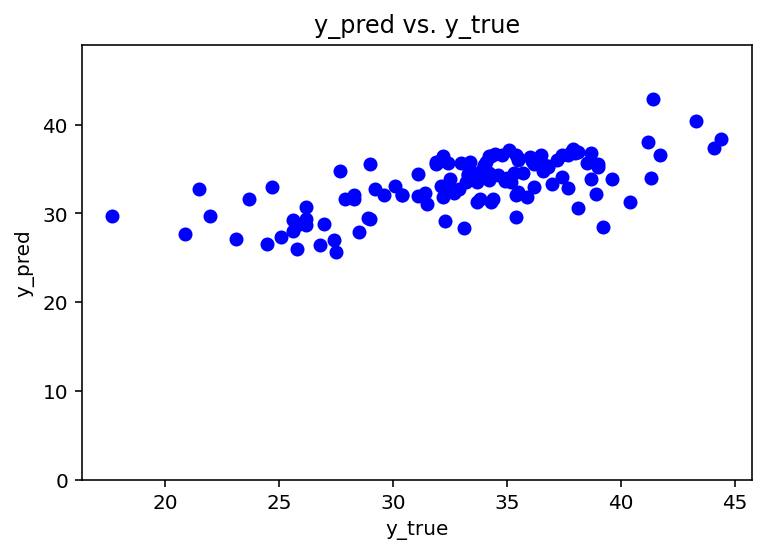

In [27]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_RFR_opt.csv', index = False, header=True)

 1) Protein                        0.173649
 2) Hemicellulose                  0.168190
 3) Ash                            0.163938
 4) Cellulose                      0.160848
 5) Carbohydrate                   0.128531
 6) Lignin                         0.124795
 7) Lipid                          0.080048


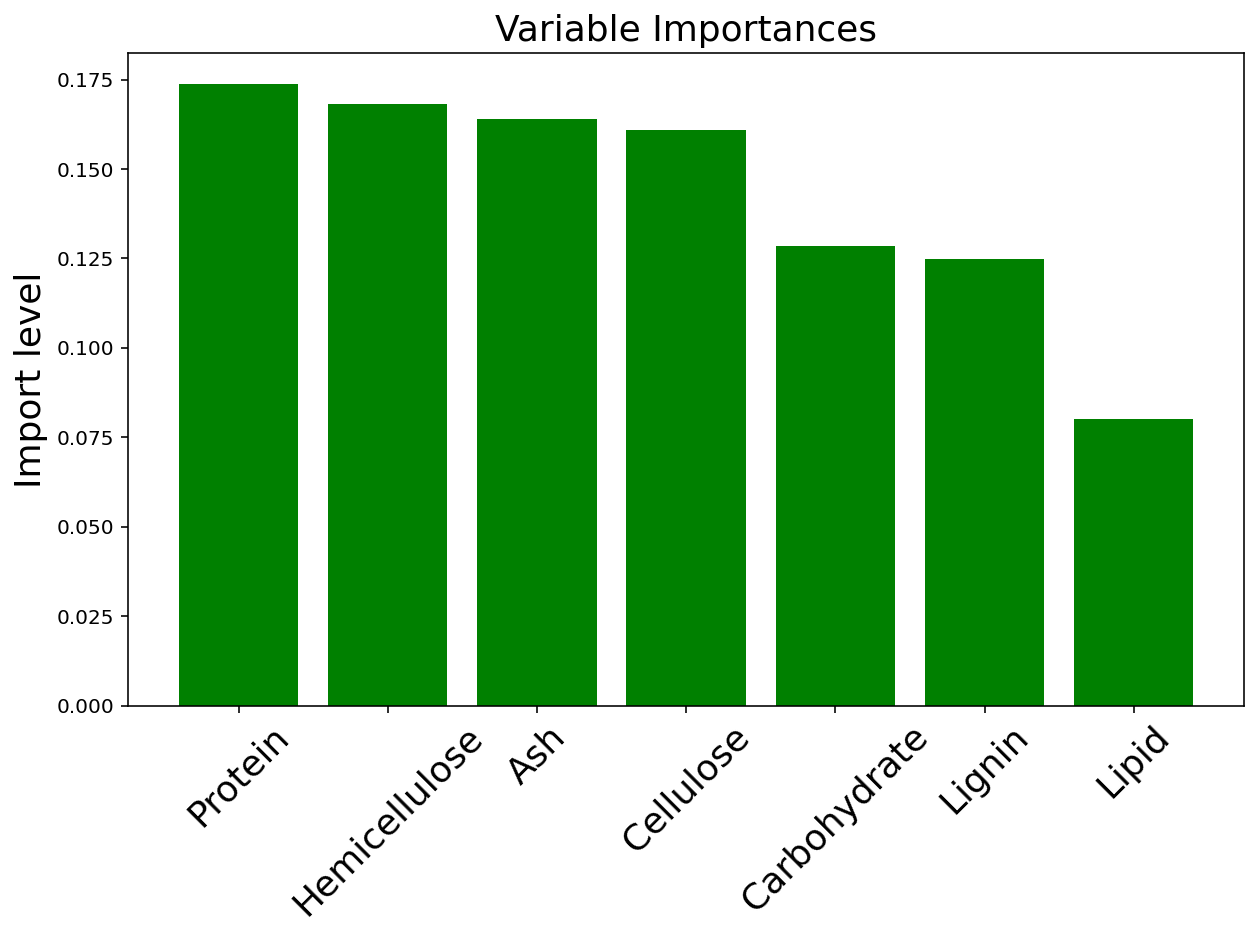

In [28]:
import matplotlib.pyplot as plt

Features.columns = ['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']
feat_labels = Features.columns[0:]

# get importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

x_columns = Features.columns[0:]
x_columns_indices = []

# summarize feature importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])

# plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.title("Variable Importances", fontsize=18)
plt.ylabel("Import level", fontsize=18, rotation=90)

for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='green', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=45, fontsize=18)
plt.show()

fig.savefig('Variable Importances.png')